In [1]:
import cv2 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

/home/artemi8/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
CATEGORIES = ["Covid19-negative", "Covid19-positive"]

In [3]:
def prepare(filepath):
    IMG_SIZE = 224  # 50 in txt-based
    img_array = cv2.imread(filepath)# read in the image, convert to grayscale
#     print(np.shape(img_array))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE,3)  # return the image with shaping that TF wants.

def plot_image(image_dir, predicted):
    temp_img = cv2.imread(image_dir)
    fig = plt.figure()
    a = fig.add_subplot(1, 1, 1)
    imgplot = plt.imshow(temp_img)
    a.set_title(str(predicted), fontsize=20)
    plt.show()

In [4]:
model = tf.keras.models.load_model("covid19.model")

In [5]:
directory=['trail.png','trail1.png','test_pos.jpg']

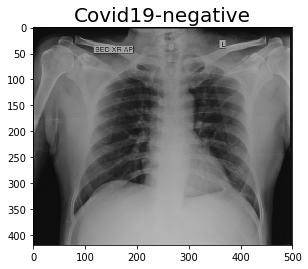

In [6]:
prediction = model.predict([prepare(directory[0])])  #Healthy image
predicted = CATEGORIES[int(prediction[0][0])]
plot_image(directory[0], predicted)

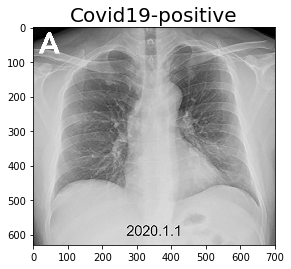

In [7]:
prediction = model.predict([prepare(directory[2])])  #Covid19 positive image
predicted = CATEGORIES[int(prediction[0][0])]
plot_image(directory[2], predicted)